<a href="https://colab.research.google.com/github/MuhammadHaikalD4-TI/MuhammadHaikalD4-TI.github.io/blob/main/3A_20_Muhammad_Haikal_Buldan_Modul_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Haikal Buldan
TI-3A |20

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


**Convolution Tanpa Library**

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image
img_m = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

**Sharpen**

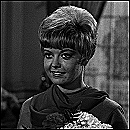

In [ ]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

**Emboss**

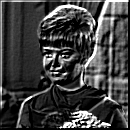

In [ ]:
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

**Left Sobel Edge Detection**

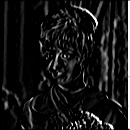

In [ ]:
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

**Canny Edge Detection**

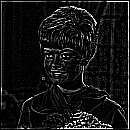

In [ ]:
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

**21x21 Gaussian Blur**

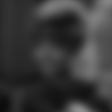

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

**5x5 Gaussian Blur**

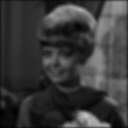

In [ ]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

In [ ]:
import cv2

# Ganti 'ktp.jpg' dengan nama file citra KTP Anda
ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/ktp 1.jpg')


In [ ]:
# Filter Gaussian 5x5
ktp_filtered = cv2.GaussianBlur(ktp_image, (5, 5), 0)


In [ ]:
# Konversi citra ke grayscale
ktp_gray = cv2.cvtColor(ktp_filtered, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan filter Sobel
ktp_edges = cv2.Sobel(ktp_gray, cv2.CV_8U, 1, 0, ksize=3)


In [ ]:
# Histogram equalization pada citra tepi
ktp_edges_equalized = cv2.equalizeHist(ktp_edges)


In [ ]:
# Konversi kembali citra tepi yang telah di-enhance ke citra RGB
ktp_edges_equalized_rgb = cv2.cvtColor(ktp_edges_equalized, cv2.COLOR_GRAY2BGR)

# Operasi aritmatika: Penambahan citra asli dengan citra tepi yang telah di-enhance
ktp_result = cv2.addWeighted(ktp_image, 0.7, ktp_edges_equalized_rgb, 0.3, 0)


In [ ]:
cv2.imwrite('ktp_perbaikan.jpg', ktp_result)


True

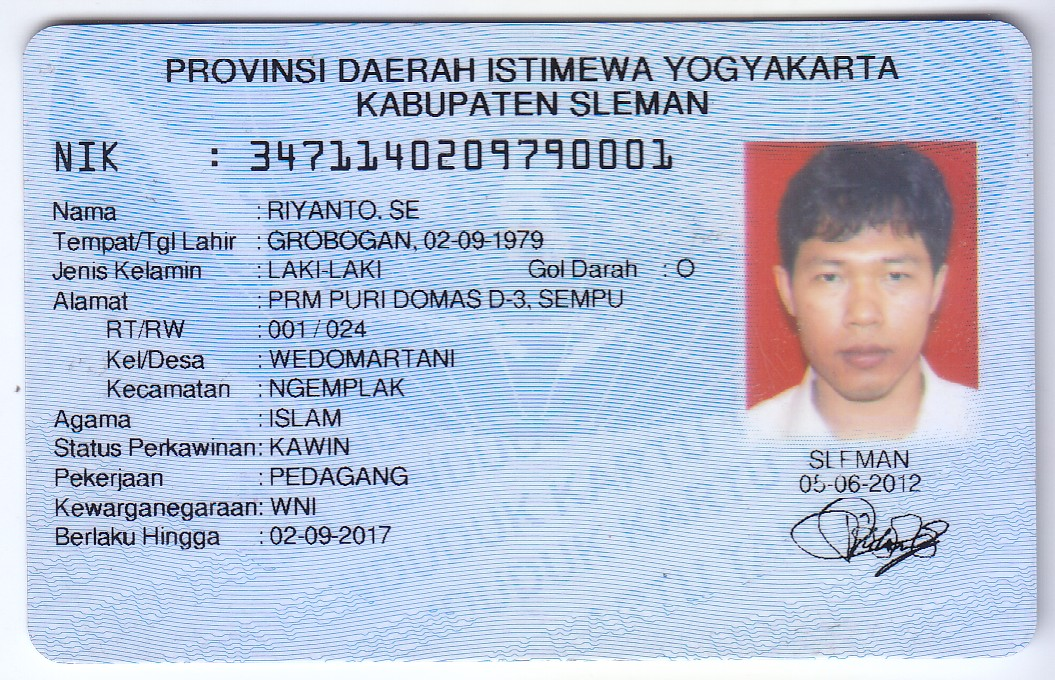

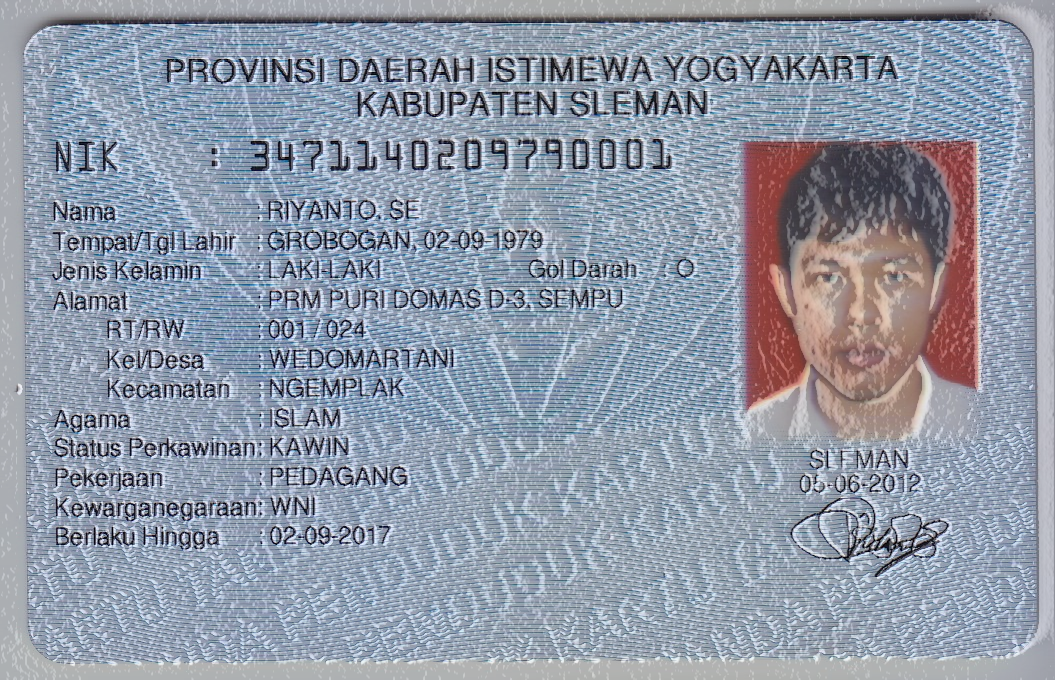

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/ktp 1.jpg')

# Filter Gaussian 5x5
ktp_filtered = cv2.GaussianBlur(ktp_image, (5, 5), 0)

# Konversi citra ke grayscale
ktp_gray = cv2.cvtColor(ktp_filtered, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan filter Sobel
ktp_edges = cv2.Sobel(ktp_gray, cv2.CV_8U, 1, 0, ksize=3)

# Histogram equalization pada citra tepi
ktp_edges_equalized = cv2.equalizeHist(ktp_edges)

# Konversi kembali citra tepi yang telah di-enhance ke citra RGB
ktp_edges_equalized_rgb = cv2.cvtColor(ktp_edges_equalized, cv2.COLOR_GRAY2BGR)

# Operasi aritmatika: Penambahan citra asli dengan citra tepi yang telah di-enhance
ktp_result = cv2.addWeighted(ktp_image, 0.7, ktp_edges_equalized_rgb, 0.3, 0)

# Tampilkan citra asli dan citra yang telah diperbaiki
cv2_imshow(ktp_image)
cv2_imshow(ktp_result)
cv2.waitKey(0)
cv2.destroyAllWindows()
